<a href="https://colab.research.google.com/github/D1pesh/ML/blob/main/ML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
#Reading CSV file.
df = pd.read_csv('/content/archive (1).zip')
df

,UserId,UsageDuraiton,Age,Country,TotalLikes
0,1,2,55,Turkey,5
1,2,6,45,Canada,10
2,3,3,50,Ireland,7
3,4,4,35,South Africa,5
4,5,1,58,Turkey,2
...,...,...,...,...,...
58,58,2,51,Turkey,1
59,59,8,19,Germany,15
60,60,2,20,Bulgaria,4
61,61,9,18,Germany,18


In [ ]:
#Dropping the unwanted columns.
df.drop(columns = [
'Country'], inplace= True)

In [ ]:
df

,UserId,UsageDuraiton,Age,TotalLikes
0,1,2,55,5
1,2,6,45,10
2,3,3,50,7
3,4,4,35,5
4,5,1,58,2
...,...,...,...,...
58,58,2,51,1
59,59,8,19,15
60,60,2,20,4
61,61,9,18,18


In [ ]:

#To Find the Null or missing values in each Column.
df.isnull().sum()

,0
UserId,0
UsageDuraiton,0
Age,0
TotalLikes,0


In [ ]:

#To Find the Null or missing values in each Column in Percentage.
(df.isnull().sum()*100)/df.shape[0]


,0
UserId,0.0
UsageDuraiton,0.0
Age,0.0
TotalLikes,0.0


In [ ]:

#This drops the rows with null values.
df.dropna(inplace=True)

In [ ]:

df.isnull().sum()

,0
UserId,0
UsageDuraiton,0
Age,0
TotalLikes,0


In [ ]:

#Noarmalization...
b = (df['Age'] - df['Age'].min())/(df['Age'].max()- df['Age'].min())
b


,Age
0,0.880952
1,0.642857
2,0.761905
3,0.404762
4,0.952381
...,...
58,0.785714
59,0.023810
60,0.047619
61,0.000000


In [ ]:

features = df.drop('Age', axis = 1)
target = df['Age']

In [ ]:

from sklearn.model_selection import train_test_split

In [ ]:
# Training and Testing the sets.
X_train, X_test, y_train, y_test=train_test_split(features,target,test_size=0.2)

In [ ]:

from sklearn.tree import DecisionTreeClassifier

In [ ]:

model=DecisionTreeClassifier()
model.fit(X_train,y_train)

DecisionTreeClassifier()

In [ ]:

model.score(X_test,y_test)

0.23076923076923078

In [ ]:

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [ ]:

#Predicting  on Training and Testing .
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

In [ ]:

# Training set performance
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='weighted', zero_division=0)
train_recall = recall_score(y_train, y_train_pred, average='weighted')
train_f1 = f1_score(y_train, y_train_pred, average='weighted')

In [ ]:
train_accuracy

1.0

In [ ]:

train_precision

1.0

In [ ]:

train_recall


1.0

In [ ]:

train_f1


1.0

In [ ]:

# Testing set performance
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_recall = recall_score(y_test, y_test_pred, average='weighted', zero_division=0)
test_f1 = f1_score(y_test, y_test_pred, average='weighted')

In [ ]:

test_accuracy


0.23076923076923078

In [ ]:

test_precision

0.23076923076923078

In [ ]:

test_recall

0.23076923076923078

In [ ]:

test_f1

0.23076923076923078

In [ ]:

model.predict([[1,9,49]])


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:465: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([18])

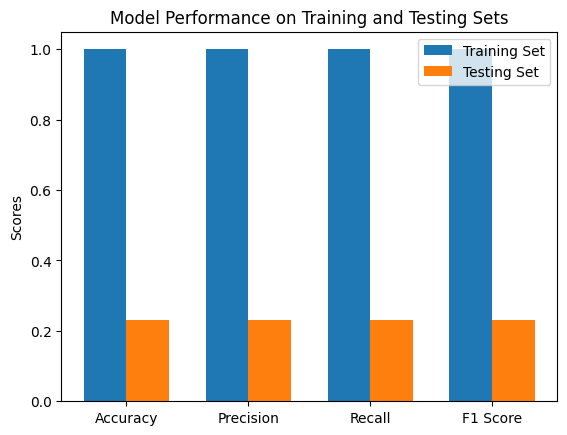

In [ ]:
#Visualizating Model Perforamnce...
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
train_scores = [train_accuracy, train_precision, train_recall, train_f1]
test_scores = [test_accuracy, test_precision, test_recall, test_f1]

x = np.arange(len(metrics))
width = 0.35

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_scores, width, label='Training Set')
rects2 = ax.bar(x + width/2, test_scores, width, label='Testing Set')


ax.set_ylabel('Scores')
ax.set_title('Model Performance on Training and Testing Sets')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend()


plt.show()

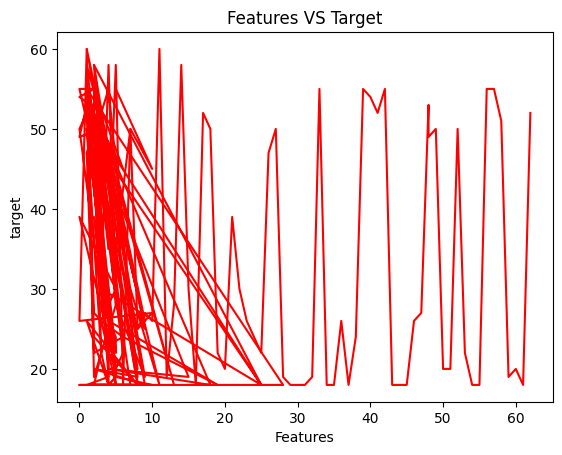

In [ ]:

plt.plot(features,target,'r')
plt.xlabel('Features')
plt.ylabel('target')
plt.title('Features VS Target')
plt.show()